In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data_folder_path = Path('../../../data/')
print(os.listdir(data_folder_path))

['data_train_all_columns.csv', 'chordonomicon_raw.csv', 'final_test.csv', 'matrix_expanded_final_train.csv', 'density_expanded_final_train.csv', '.DS_Store', 'spotify_hot100.csv', 'data_train_continuous_data.csv', 'spotify_final.csv', 'clean_test_with_4_grams.csv', 'final_train.csv', 'final_train_pop.csv', 'data_train_n_grams.csv', 'data_train_all.csv', 'clean_test_with_5_grams.csv', 'clean_test_with_3_grams.csv', 'final_test_pop.csv']


In [3]:
data = pd.read_csv(data_folder_path / 'data_train_all.csv')
data_columns = pd.read_csv(data_folder_path / 'data_train_all_columns.csv')
print("Training data shape:", data.shape)
print("Column table columns:", data_columns.columns)
print("Unique column types:", data_columns.column_type.unique())

Training data shape: (255606, 144)
Column table columns: Index(['column_name', 'column_type'], dtype='object')
Unique column types: ['id' 'data' 'target' 'predictor_continuous' 'predictor_n_grams']


In [4]:
predictor_ngrams_columns = data_columns[data_columns['column_type'] == 'predictor_n_grams']['column_name'].tolist()
print(f"Number of n-gram columns: {len(predictor_ngrams_columns)}")

Number of n-gram columns: 109


In [5]:
target_columns = data_columns[data_columns['column_type'] == 'target']['column_name'].tolist()
print(f"Target columns: {target_columns}")
print(f"Number of target columns: {len(target_columns)}")

Target columns: ['spotify_popularity', 'on_hot100', 'decade', 'main_genre']
Number of target columns: 4


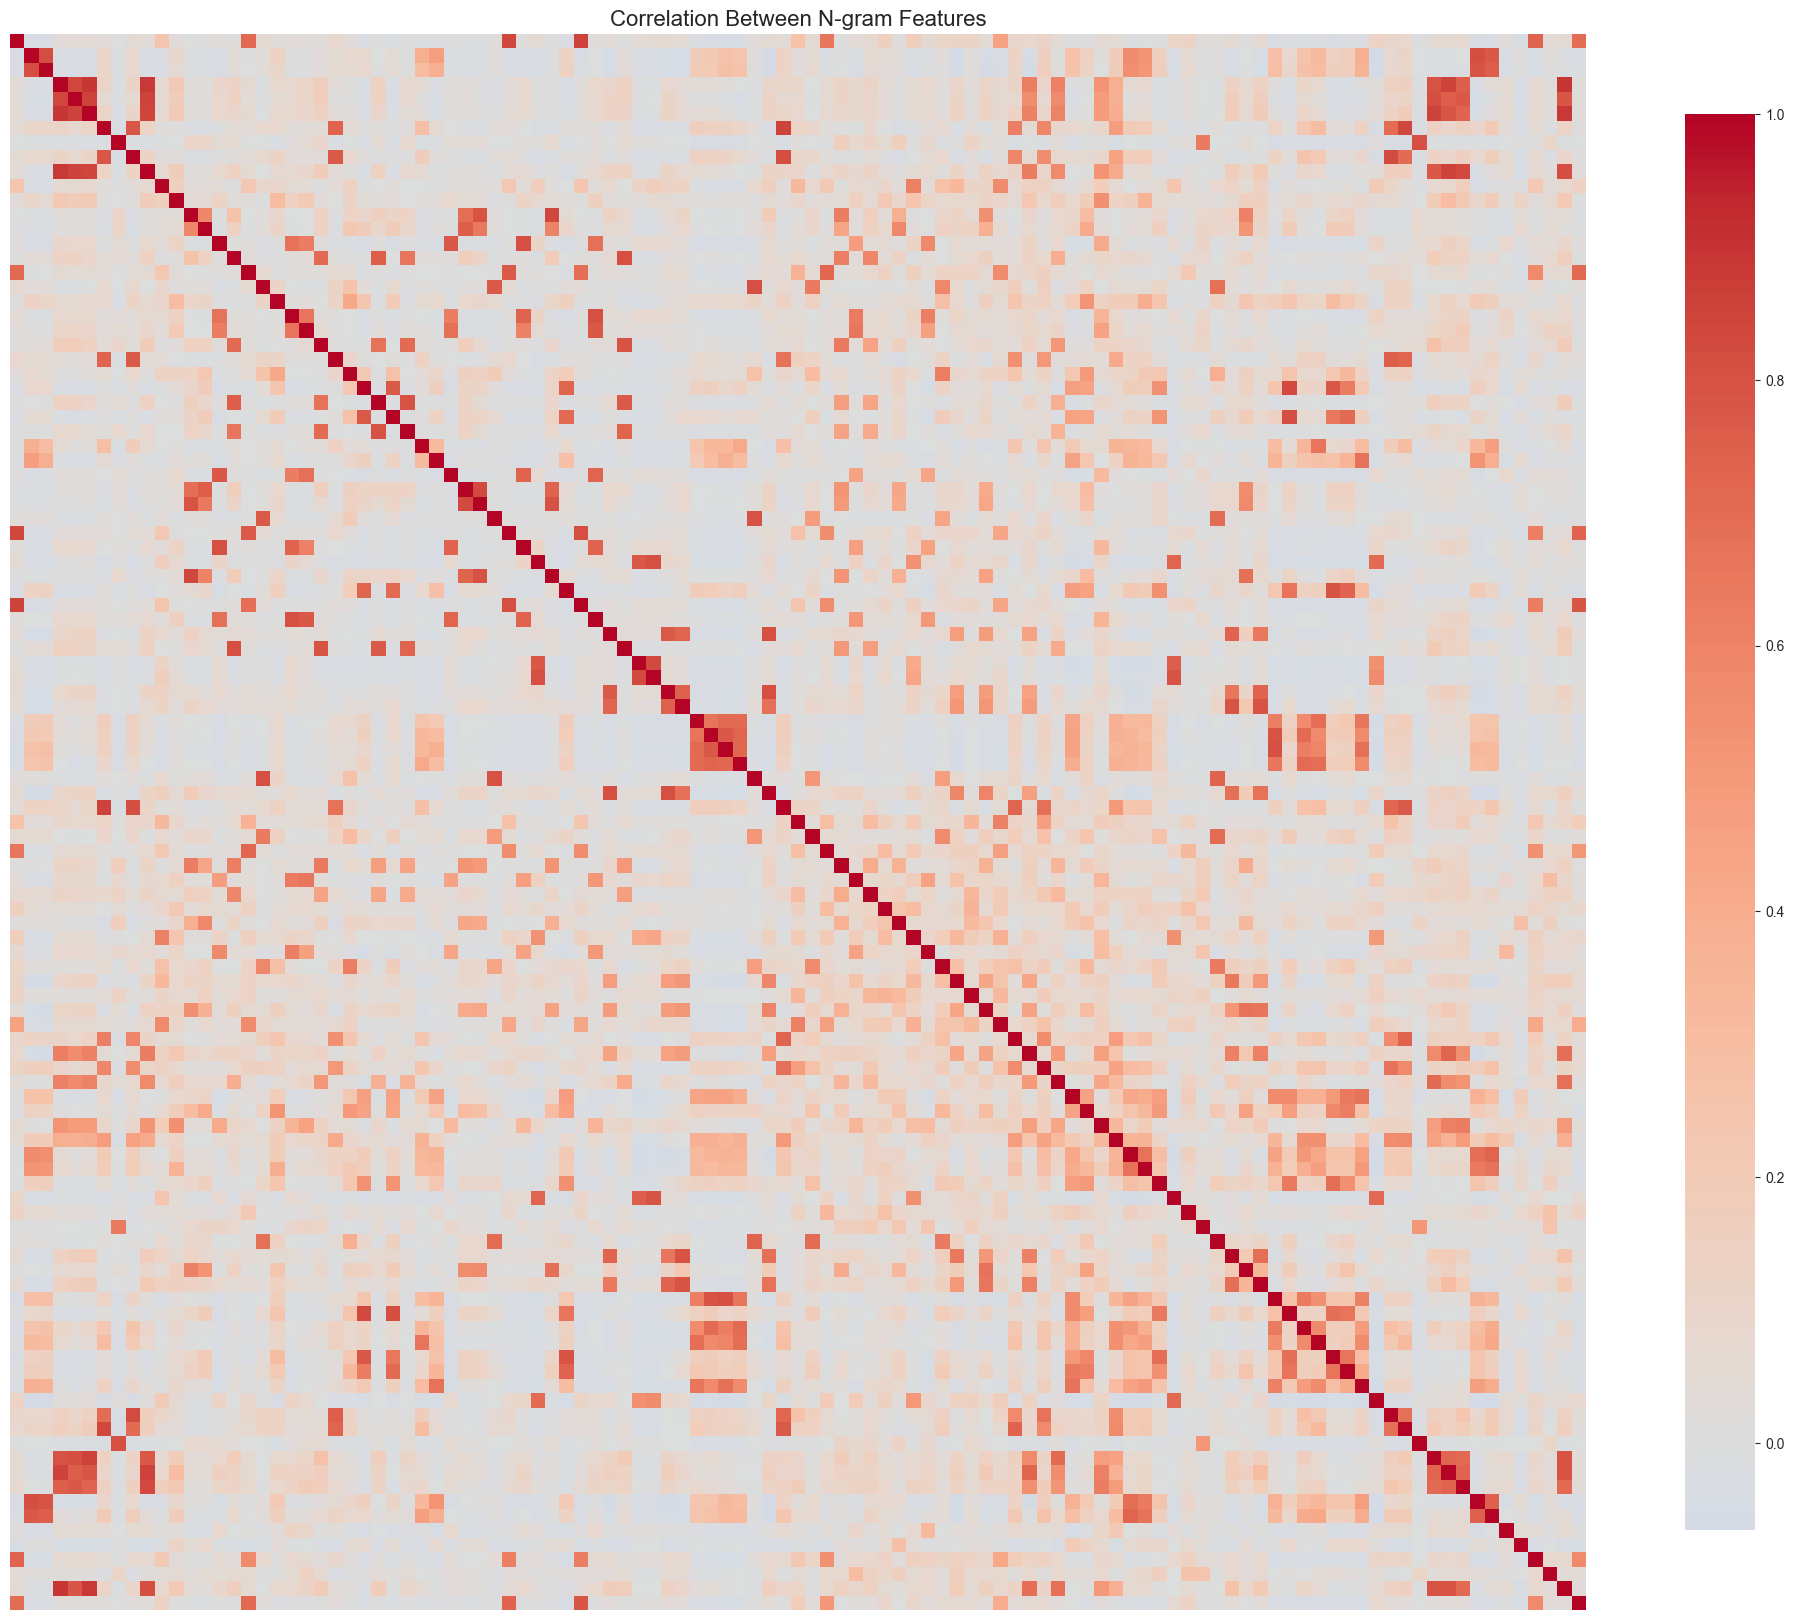

In [13]:
# Figure 1-A
# Correlation Matrix of all n-gram features
# Shows relationships between encoded features

plt.figure(figsize=(20, 18))
corr_matrix = data[predictor_ngrams_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True,
            xticklabels=False, yticklabels=False, cbar_kws={'shrink': 0.8})
plt.title('Correlation Between N-gram Features', fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
# Figure 1-B
# Focus on high correlations only
# If features are highly correlated, they should be removed

corr_matrix = data[predictor_ngrams_columns].corr()
# Get pairs with high correlation (excluding diagonal)
high_corr = corr_matrix.where(
    (corr_matrix.abs() > 0.7) & (corr_matrix != 1.0)
).stack().sort_values(ascending=False)
print(f"Pairs with |correlation| > 0.7:\n{high_corr}")

print(f"\nHighly correlated features could be removed.")

Pairs with |correlation| > 0.7:
contains_C,G,Amin,F,C  contains_G,Amin,F,C      0.893795
contains_G,Amin,F,C    contains_C,G,Amin,F,C    0.893795
contains_G,Amin,F,C,G  contains_C,G,Amin,F,C    0.893044
contains_C,G,Amin,F,C  contains_G,Amin,F,C,G    0.893044
contains_F,C,G,Amin,F  contains_C,G,Amin,F,C    0.883947
                                                  ...   
contains_C,G,D,G       contains_G,C,G,D,G       0.703242
contains_Emin,C,G      contains_Amin,F,C,G      0.702275
contains_Amin,F,C,G    contains_Emin,C,G        0.702275
contains_G,Emin,C,G    contains_C,G,Emin,C      0.701753
contains_C,G,Emin,C    contains_G,Emin,C,G      0.701753
Length: 246, dtype: float64

Highly correlated features could be removed.


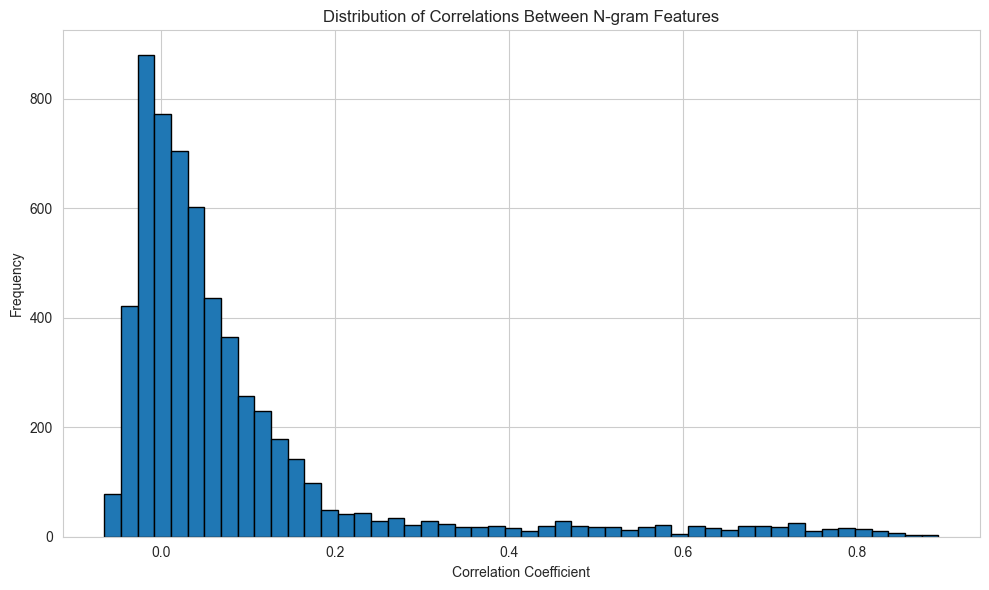

Most features are not correlated.


In [20]:
# Figure 1-C
# Distribution of correlations

corr_matrix = data[predictor_ngrams_columns].corr()
# Get upper triangle values (excluding diagonal)
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
corr_values = upper_tri.stack()

plt.figure(figsize=(10, 6))
plt.hist(corr_values, bins=50, edgecolor='black')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlations Between N-gram Features')
plt.tight_layout()
plt.show()

print("Most features are not correlated.")

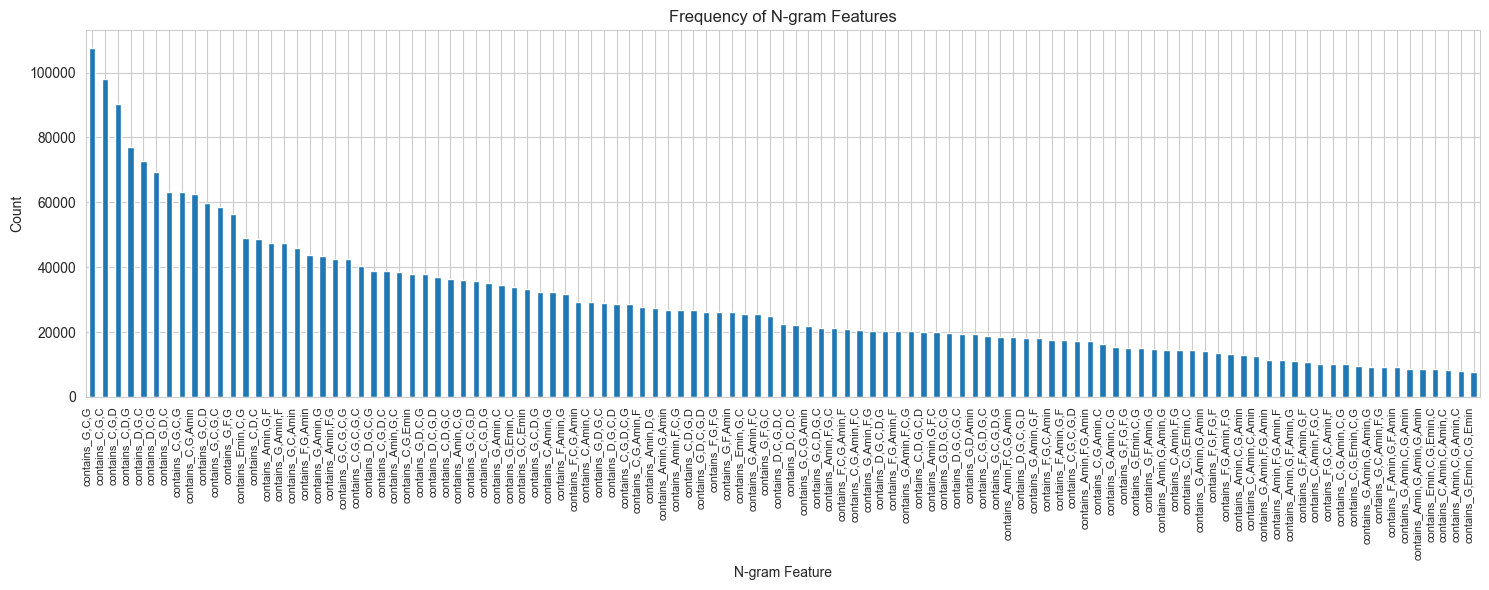

Total n-gram features: 109

Most common n-grams:
contains_G,C,G       107596
contains_C,G,C        97928
contains_C,G,D        90270
contains_C,D,G        76912
contains_D,G,C        72802
contains_D,C,G        69276
contains_G,D,C        63322
contains_C,G,C,G      63243
contains_C,G,Amin     62593
contains_G,C,D        59757
dtype: int64

Least common n-grams:
contains_C,G,Emin,C,G          9618
contains_G,Amin,G,Amin,G       9379
contains_G,C,Amin,F,G          9292
contains_F,Amin,G,F,Amin       9171
contains_G,Amin,C,G,Amin       8637
contains_Amin,G,Amin,G,Amin    8591
contains_Emin,C,G,Emin,C       8503
contains_C,Amin,C,Amin,C       8333
contains_Amin,C,G,Amin,C       7974
contains_G,Emin,C,G,Emin       7631
dtype: int64


In [24]:
# Figure 2
# Bar Chart of N-gram Feature Frequencies
# Shows how often each n-gram appears in the dataset

feature_counts = data[predictor_ngrams_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
feature_counts.plot(kind='bar')
plt.xlabel('N-gram Feature')
plt.ylabel('Count')
plt.title('Frequency of N-gram Features')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

print(f"Total n-gram features: {len(feature_counts)}")
print(f"\nMost common n-grams:")
print(feature_counts.head(10))
print(f"\nLeast common n-grams:")
print(feature_counts.tail(10))

<Figure size 1500x800 with 0 Axes>

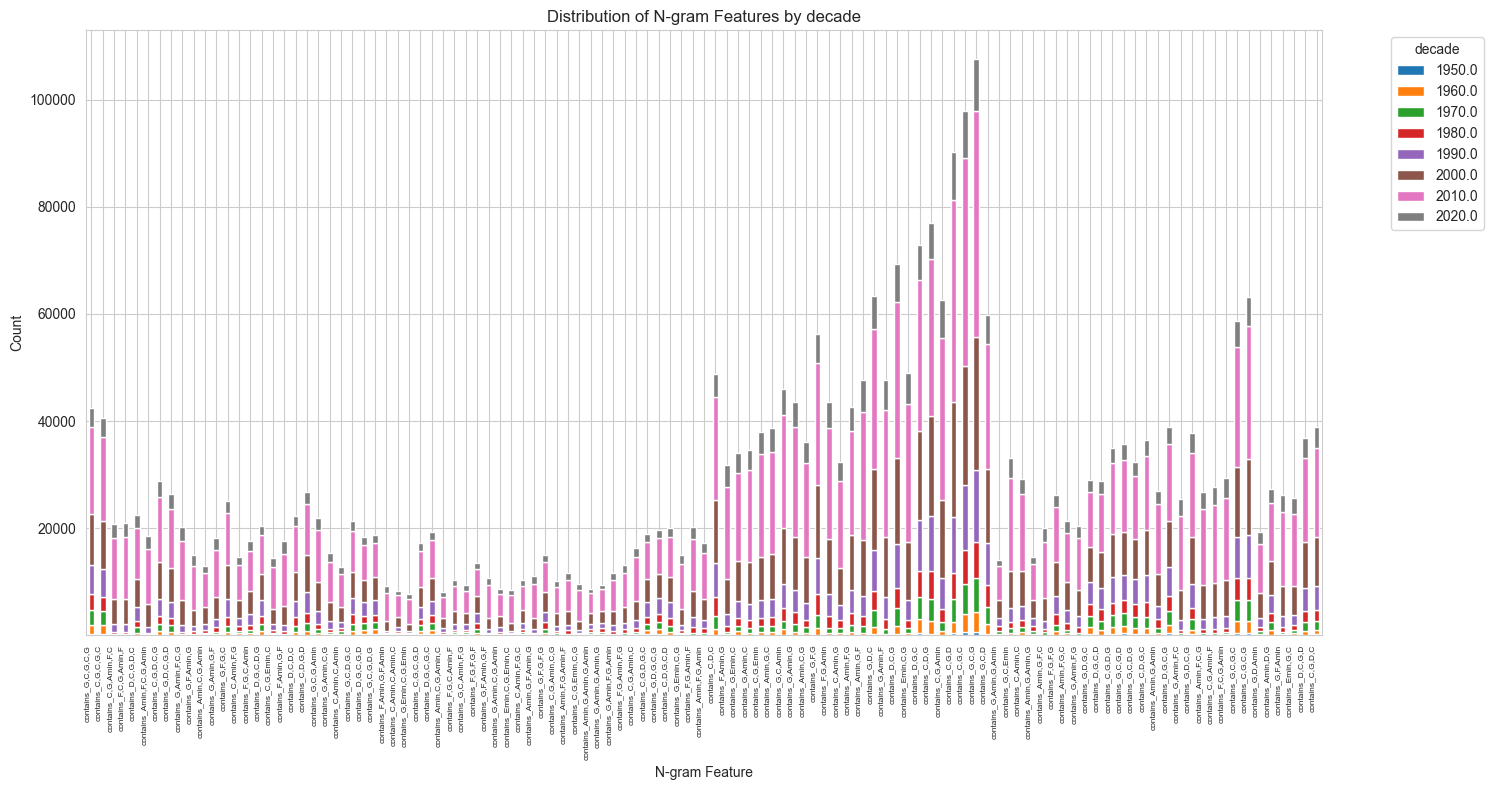


Target variable: decade
Unique values: [2010. 2000. 2020. 1980. 1990. 1970. 1950. 1960.]
Value counts:
decade
2010.0    109125
2000.0     58278
1990.0     28002
2020.0     26758
1980.0     13954
1970.0     11741
1960.0      6650
1950.0      1098
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

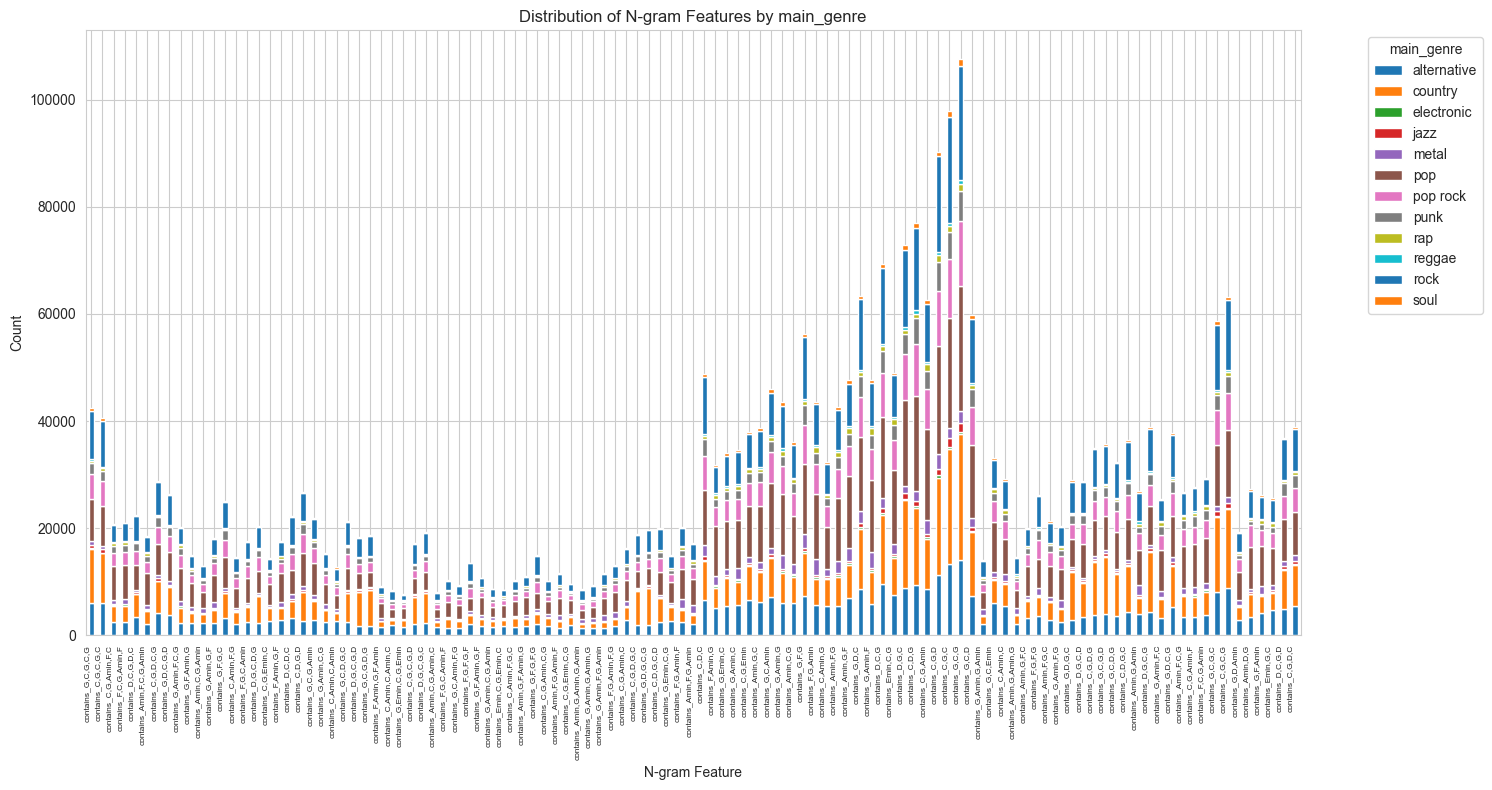


Target variable: main_genre
Unique values: ['pop' 'alternative' 'metal' 'electronic' 'rock' 'pop rock' 'rap'
 'country' 'punk' 'soul' 'jazz' 'reggae']
Value counts:
main_genre
pop            61711
rock           48815
country        37995
alternative    35884
pop rock       28824
punk           12229
metal           8597
rap             7354
soul            5212
jazz            4491
reggae          2783
electronic      1711
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

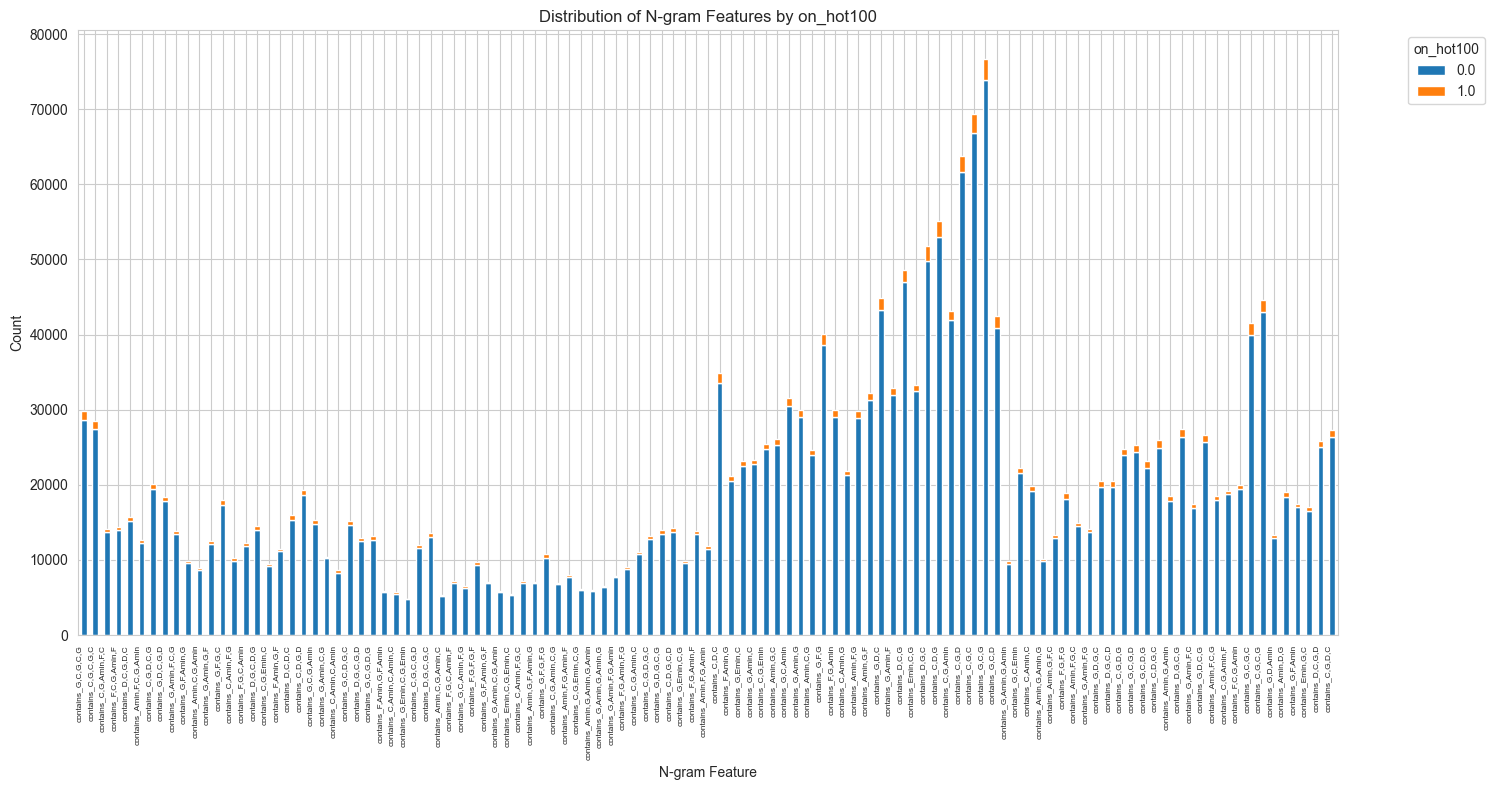


Target variable: on_hot100
Unique values: [ 0. nan  1.]
Value counts:
on_hot100
0.0    174764
1.0      6395
Name: count, dtype: int64


In [6]:
# Figure 3
# Stacked Bar Charts showing N-gram distribution by target variables

for target_col in ['decade', 'main_genre', 'on_hot100']:
    # Group by target variable and sum n-gram features
    grouped = data.groupby(target_col)[predictor_ngrams_columns].sum()

    plt.figure(figsize=(15, 8))
    grouped.T.plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.xlabel('N-gram Feature')
    plt.ylabel('Count')
    plt.title(f'Distribution of N-gram Features by {target_col}')
    plt.xticks(rotation=90, ha='right', fontsize=6)
    plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print(f"\nTarget variable: {target_col}")
    print(f"Unique values: {data[target_col].unique()}")
    print(f"Value counts:\n{data[target_col].value_counts()}")

/var/folders/yt/44gbv3bd0k15llmt36fv_8600000gn/T/ipykernel_5122/3357184677.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('popularity_binned')[predictor_ngrams_columns].sum()


<Figure size 1500x800 with 0 Axes>

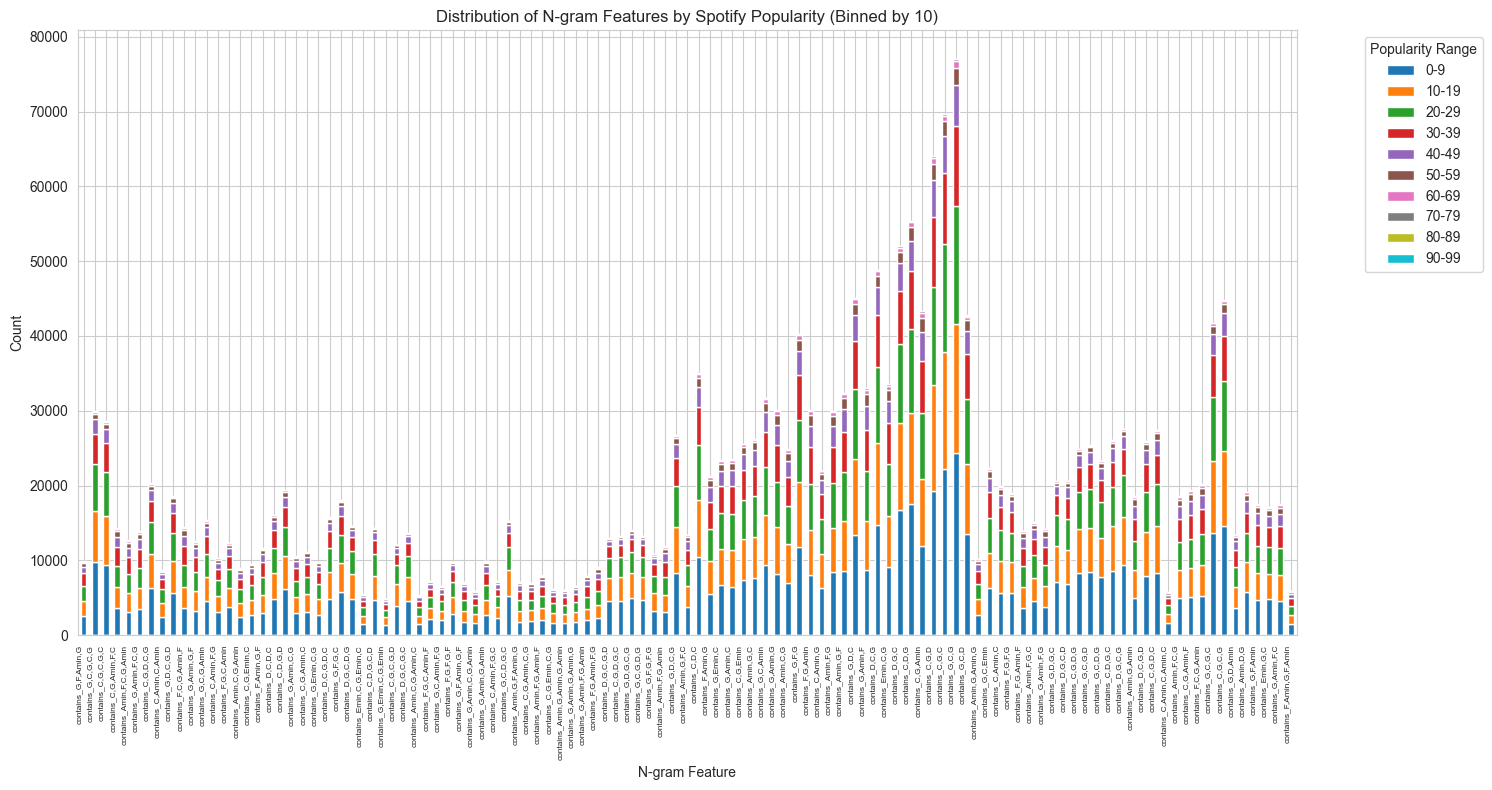


Target variable: spotify_popularity (binned)
Bin counts:
popularity_binned
0-9      51260
10-19    37051
20-29    36840
30-39    28426
40-49    16304
50-59     7887
60-69     3190
70-79     1016
80-89      134
90-99        0
Name: count, dtype: int64


In [28]:
# Figure 3 - Spotify Popularity (binned by 10)
# Create bins for spotify_popularity
data['popularity_binned'] = pd.cut(data['spotify_popularity'],
                                    bins=range(0, 101, 10),
                                    labels=[f'{i}-{i+9}' for i in range(0, 100, 10)],
                                    include_lowest=True)

# Group by binned popularity and sum n-gram features
grouped = data.groupby('popularity_binned')[predictor_ngrams_columns].sum()

plt.figure(figsize=(15, 8))
grouped.T.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('N-gram Feature')
plt.ylabel('Count')
plt.title('Distribution of N-gram Features by Spotify Popularity (Binned by 10)')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.legend(title='Popularity Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(f"\nTarget variable: spotify_popularity (binned)")
print(f"Bin counts:\n{data['popularity_binned'].value_counts().sort_index()}")